# Part 1 - Exploratory Data Analysis of Login Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
df = pd.read_json('logins.json')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
# The data is supposed to be from January 2014, but it starts in January 1970
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
# convert the year to 2014; Jan 1 is Wednesday in 2014, Thursday in 1970
df['login_time'] = df['login_time'].apply(lambda dt: dt.replace(year=2014))

In [6]:
df.head()

,login_time
0,2014-01-01 20:13:18
1,2014-01-01 20:16:10
2,2014-01-01 20:16:37
3,2014-01-01 20:16:36
4,2014-01-01 20:26:21


In [7]:
# Set the login_tima as index and create a count variable, to enable 15min grouping
df.set_index('login_time', inplace=True)
df.sort_index(inplace=True)
df['count'] = 1
df15 = df.resample('15min').count()

In [8]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 2014-01-01 20:00:00 to 2014-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


In [9]:
df15.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


### Displaying a line plot of user logins reveals a cyclical pattern with a few spikes, but generally stable over time. There does not appear to be an overall growth trend.

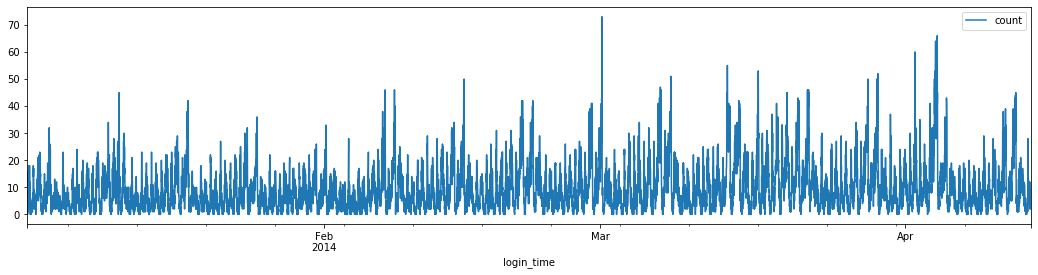

In [10]:
df15.plot(kind="line", figsize=(18, 4))
plt.show()

In [11]:
# Create columns for "Day of Week" and "Hour of Day"
df15['day_name'] = df15.index.map(lambda x:x.day_name())
df15['dayofweek'] = df15.index.map(lambda x:x.dayofweek)
df15['hour'] = df15.index.map(lambda x:x.hour)

In [12]:
df15.head()

,count,day_name,dayofweek,hour
login_time,,,,
2014-01-01 20:00:00,2,Wednesday,2,20
2014-01-01 20:15:00,6,Wednesday,2,20
2014-01-01 20:30:00,9,Wednesday,2,20
2014-01-01 20:45:00,7,Wednesday,2,20
2014-01-01 21:00:00,1,Wednesday,2,21


### The visualization shows higher activity heading into the weekend, then tapering off on Sunday.

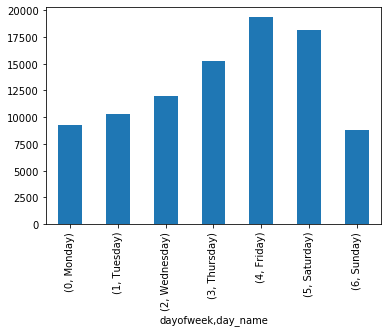

In [13]:
df15.groupby(["dayofweek", "day_name"])['count'].sum().plot(kind="bar")

### The hourly activitiy plot shows peak demand for the hours near midight, with another concentration in a tighter range arounf noon.

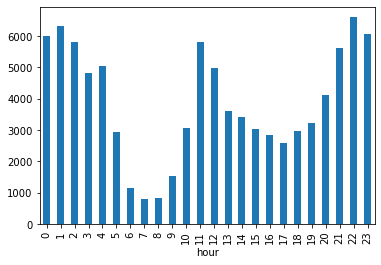

In [14]:
df15.groupby(["hour"])['count'].sum().plot(kind="bar")

### Grouping the hourly activity by day of week shows peak activity on Thursday nights heading into Friday morning and Friday nights heading into the wee hours of Saturday morning. 

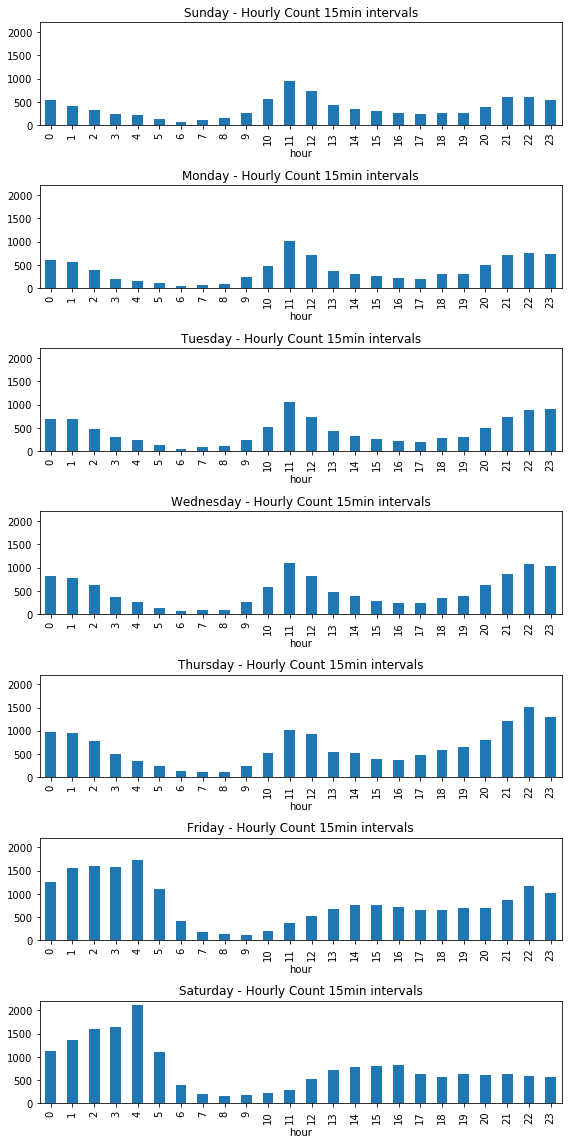

In [15]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7)\
= plt.subplots(nrows=7, ncols=1, sharey=True, figsize=(8,16))

ax1.set_title("Sunday - Hourly Count 15min intervals")
df15[(df15["day_name"]=="Sunday")].groupby(["hour"])['count'].sum().plot(kind="bar", ax=ax1)

ax2.set_title("Monday - Hourly Count 15min intervals")
df15[(df15["day_name"]=="Monday")].groupby(["hour"])['count'].sum().plot(kind="bar", ax=ax2)

ax3.set_title("Tuesday - Hourly Count 15min intervals")
df15[(df15["day_name"]=="Tuesday")].groupby(["hour"])['count'].sum().plot(kind="bar", ax=ax3)

ax4.set_title("Wednesday - Hourly Count 15min intervals")
df15[(df15["day_name"]=="Wednesday")].groupby(["hour"])['count'].sum().plot(kind="bar", ax=ax4)

ax5.set_title("Thursday - Hourly Count 15min intervals")
df15[(df15["day_name"]=="Thursday")].groupby(["hour"])['count'].sum().plot(kind="bar", ax=ax5)

ax6.set_title("Friday - Hourly Count 15min intervals")
df15[(df15["day_name"]=="Friday")].groupby(["hour"])['count'].sum().plot(kind="bar", ax=ax6)

ax7.set_title("Saturday - Hourly Count 15min intervals")
df15[(df15["day_name"]=="Saturday")].groupby(["hour"])['count'].sum().plot(kind="bar", ax=ax7)


fig.tight_layout()
plt.show()

# Part 2 - Experiment and Metrics Design#

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Answer: The key measure is whether drivers are able to increase their capacity, because the proposal is designed to take advantage of the complementary rhythms between cities. This implies that drivers are sitting idle when they could be operating in peak hours by going over the bridge to the other city. Using the data supplied for this exercise, the capacity can be measured by the level of logins combined with user data measuring number of trips and surge classification. It can be implied that data is available on driver pickup logs, rates, and the toll charges which are to be reimbursed. Although that data is not described, it would be the direct source of measuring whether drivers both increased their capacity and paid increased tolls.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment

Answer: The experiment is implemented by notifying drivers that tolls on the particular bridge will be reimbursed. The data that measures capacity would be analyzed to compare before and after results based on when the toll reimbursement policy is implemented.

b. what statistical test(s) you will conduct to verify the significance of the
observation

Answer: A t-test for statistical significance would validate whether any increase in driver capacity and toll expenses happened by chance or as a result of being in the implementation period. The significance of increased capacity can be tested in this manner, as well as the significance of toll increases, and correlation checked to see if these factors are related.

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

Answer: The results would be interpreted first to determine whether the increases are observed. Second, the results need to be interpreted in terms of profitability, or checking whether the toll reimbursement policy cost exceeds the revenue generated as a result. Based on the assumption of cricadian rhythms, combined with the login data showing peak login times and days, the expectation is that the greater capacity will also occur during the surge periods. Further, depending on the maturity of the market having other competitors, we are assuming that deploying the idle drivers to the surge markets will enable Ultimate to claim a larger share of the market that is already measured to exist based on logins. Features also need to be constructed to measure whether logins are resulting in rides provided by Ultimate, or whether logins are dropped, indicating that users are checking different providers and choosing the competition. That leads to another set of analysis to determine whether pricing or timeliness is a driving factor with respect to dropped logins. The recommendations would be based on tradeoffs observed which affect the immediate profitability, or whether gaining market share is a priority under the assumption that it leads to longer term profitability. The caveats are that if you are sizing up the competition, they may be doing the same. Not only would you need to consider other types of promotions or special pricing in combination, you may need to control for whether the competition is running a promotion that affects the efficacy of your own experiments.   

# Part 3 - Predictive Modeling

In [16]:
filename = 'ultimate_data_challenge.json'
with open(filename) as data_file:
    df2 = pd.DataFrame(json.load(data_file))

In [17]:
df2.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [19]:
#Check for null values
df2.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [20]:
# Fill the null driver ratings with the average for the column, and null phone with "other"
df2['avg_rating_by_driver']= df2['avg_rating_by_driver'].fillna(int(np.mean(df2['avg_rating_by_driver'])))
df2['avg_rating_of_driver']= df2['avg_rating_of_driver'].fillna(int(np.mean(df2['avg_rating_of_driver'])))
df2['phone'] = df2['phone'].fillna('Other')

In [21]:
df2.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [22]:
df2.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.503842,1.074764,8.849536,60.926084,5.796827,4.775030
std,3.792684,0.606987,0.222336,19.958811,37.081503,5.707357,0.448464
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.000000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


### Check the distribution of categorical variables with a pie chart. The "ultimate_black" classification seems interesting with 37% already using the premium service. The cities where users signed up seems relatively even, but it might mean more if more skewed. It could be interesting to see if phone type matters, especially if this represents the same distribution across the general population.


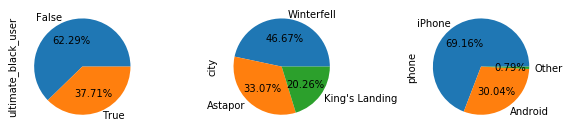

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8,6))

df2.ultimate_black_user.value_counts().plot(kind="pie", autopct='%.2f%%', ax=ax1)
df2.city.value_counts().plot(kind="pie", autopct='%.2f%%', ax=ax2)
df2.phone.value_counts().plot(kind="pie", autopct='%.2f%%', ax=ax3)

fig.tight_layout()
plt.show()

### There are a large number of users who appear to have signed up at the start of the period, but stopped taking trips soon after.

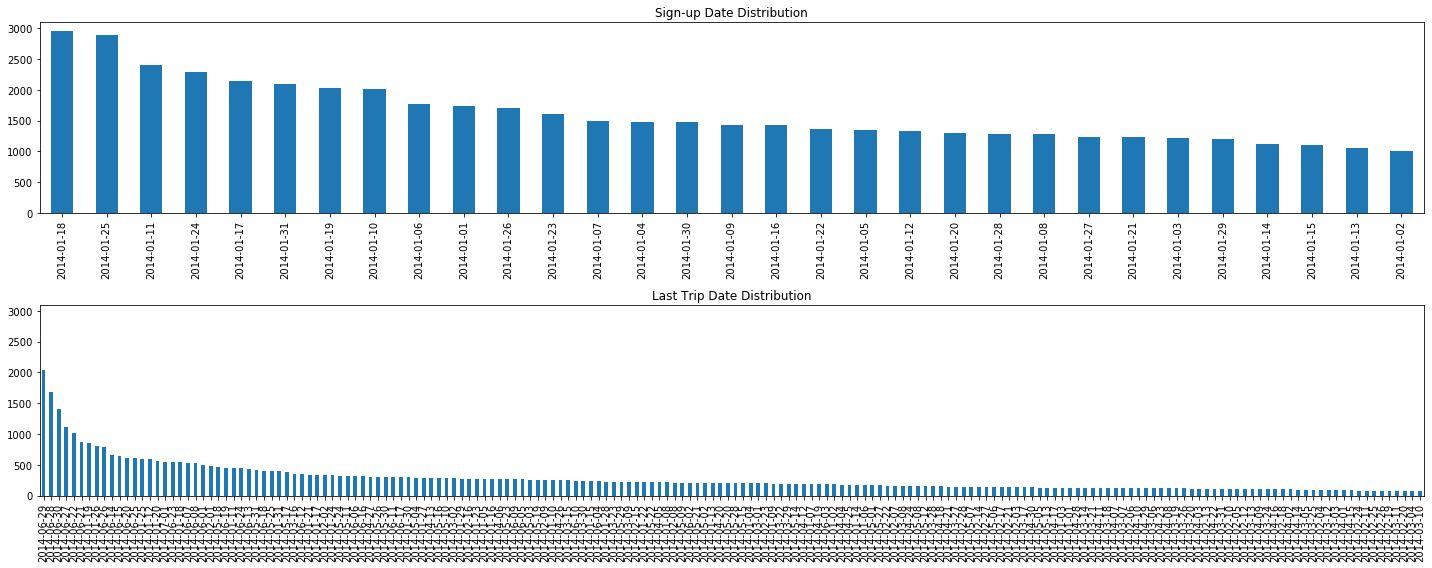

In [24]:
# Compare the dsitribution of sign-up date and last trip date on the same scale
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharey=True, figsize=(20,8))

ax1.set_title("Sign-up Date Distribution")
df2.signup_date.value_counts().plot(kind="bar", ax=ax1)

ax2.set_title("Last Trip Date Distribution")
df2.last_trip_date.value_counts().plot(kind="bar", ax=ax2)

fig.tight_layout()
plt.show()

## Convert Last Trip and SignUp to Date Format, then calculate "Active" User as last trip within last 30 days. Viusalize the distribution of Active Users grouped by Ultimate Black Users. 

In [25]:
# Convert to date but rename, in order to preserve string format for the model
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'])
df2['signup_date'] = pd.to_datetime(df2['signup_date'])

In [26]:
df2['active'] = (max(df2['last_trip_date']) - df2['last_trip_date']) <= "30 days"

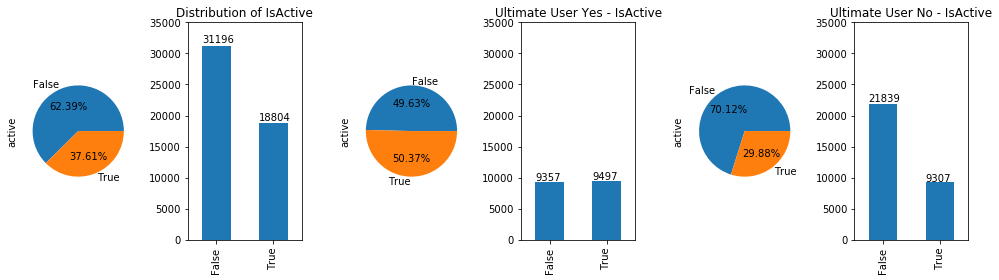

In [27]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=6, figsize=(14,4))

ax2.set_title("Distribution of IsActive")
df2.active.value_counts().sort_index().plot(kind='pie', autopct='%.2f%%', ax=ax1 )
df2.active.value_counts().sort_index().plot(kind='bar', ax=ax2 )
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax2.set_ylim(0,35000)

ax4.set_title("Ultimate User Yes - IsActive")
df2[(df2['ultimate_black_user'] == 1)].active.value_counts().sort_index().plot(kind='pie', autopct='%.2f%%', ax=ax3 )
df2[(df2['ultimate_black_user'] == 1)].active.value_counts().sort_index().plot(kind='bar', ax=ax4 )
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax4.set_ylim(0,35000)

ax6.set_title("Ultimate User No - IsActive")    
df2[(df2['ultimate_black_user'] == 0)].active.value_counts().sort_index().plot(kind='pie', autopct='%.2f%%', ax=ax5 )
df2[(df2['ultimate_black_user'] == 0)].active.value_counts().sort_index().plot(kind='bar', ax=ax6 )
for p in ax6.patches:
    ax6.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.02))
    ax6.set_ylim(0,35000)
    
fig.tight_layout()    
plt.show()


## To get the model ready with all numeric values, convert boolean features to integer, and convert categoricla features to boolean integers.

In [28]:
# Convert boolean features to integer
df2.active = df2.active.astype(int)
df2.ultimate_black_user = df2.ultimate_black_user.astype(int) 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null int32
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
active                    50000 non-null int32
dtypes: datetime64[ns](2), float64(6), int32(2), int64(1), object(2)
memory usage: 4.6+ MB


In [29]:
# Convert categorical values into boolean values
df3 = pd.get_dummies(df2, columns=['ultimate_black_user', 'city', 'phone'])

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
active                    50000 non-null int32
ultimate_black_user_0     50000 non-null uint8
ultimate_black_user_1     50000 non-null uint8
city_Astapor              50000 non-null uint8
city_King's Landing       50000 non-null uint8
city_Winterfell           50000 non-null uint8
phone_Android             50000 non-null uint8
phone_Other               50000 non-null uint8
phone_iPhone              50000 non-null uint8
dtypes: datetim

## After importing the models and metric, define "active" variable for the model to predict. Train, Test, Split will be used with the default test size of 25%, after training on the other 75%. This helps address the problem of overfitting. 

In [32]:
# Import models and metrics 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , precision_recall_curve , f1_score
from sklearn.metrics import classification_report , roc_auc_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
import seaborn as sns

In [33]:
#df3.signup_date = df3.signup_date.astype(np.int64)
#df3.last_trip_date = df3.last_trip_date.astype(np.int64)

In [34]:
# Define X with selected columns, y as the binary variable to predict
# drop the signup/last_trip columns with datetime format, because model uses string or number
X = df3.drop(['active', 'signup_date', 'last_trip_date'] , axis = 1 ).values
y = df3['active'].values

In [35]:
# Train, Test, Split to segregate Training from Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Cross validation is employed using GridSearchCV with k=5 folds. This divides the data into k-1 folds, holding one out  as the test data, and giving each a chance to be the test set. This helps address the problem of bias by dividing up the samples. The data is centered and normalized using Standard Scaler in preprocessing. The Random Forest and Logistic Regression models were tested and compared, with some hyperparameter tuning done using GridSearchCV.

In [36]:
%%time
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('rfc', RandomForestClassifier(n_estimators=10))
         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
param_grid = {'rfc__max_depth': [30]}

#param_grid = {'rfc__max_depth': [30],
#                'rfc__class_weight': [None],
#                 'rfc__criterion' : ['entropy']}


# Instantiate the GridSearchCV object: logreg_cv
rfc = GridSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)

# Print the optimal parameters and best score
print("Tuned RFC Parameter: {}".format(rfc.best_params_))
print("Tuned RFC Accuracy: {}".format(rfc.best_score_))


# Compute and print metrics
print (confusion_matrix(y_test , rfc_predict))
print ("Accuracy score: ", accuracy_score(y_test , rfc_predict))
print("F1 score: ", f1_score(y_test , rfc_predict))
print("Precision score: " , precision_score(y_test , rfc_predict))
print("Recall score: " , recall_score(y_test , rfc_predict))
print (classification_report(y_test , rfc_predict))
rfc

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished


Tuned RFC Parameter: {'rfc__max_depth': 30}
Tuned RFC Accuracy: 0.74768
[[6419 1381]
 [1823 2877]]
Accuracy score:  0.74368
F1 score:  0.6423308774279973
Precision score:  0.6756693283231564
Recall score:  0.6121276595744681
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      7800
           1       0.68      0.61      0.64      4700

    accuracy                           0.74     12500
   macro avg       0.73      0.72      0.72     12500
weighted avg       0.74      0.74      0.74     12500

Wall time: 3.66 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('rfc',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                  

## Correlation and Feature importance are visualized below. There is not much correlation between features except the surge statistics and a string negative correlation between iPhone and Android usage. The features the show the most importance, or impact on predicting user retention, are distance and weekday usage. Perhaps this indicates loyal usage for commuting or business, as opposed to recreational peak times when users shop around to different providers. Both models perform in the 73% Accuracy Range, with Precision and other related confusion matrix metrics roughly 5% to 10% lower. These scores are not spectacular, and eyeballing the confusion matrix shows a noticeable amount of false positives and false negatives. 

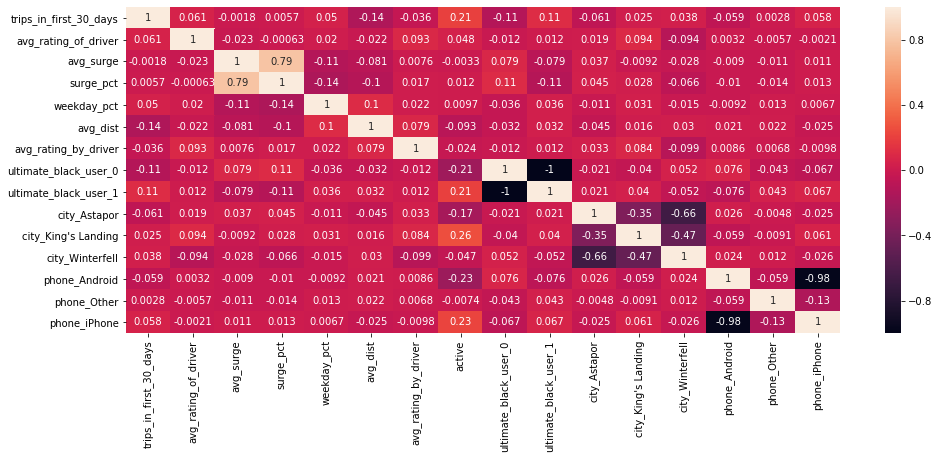

In [37]:
ax = plt.subplots(figsize=(16,6)) 
#corrMatrix = df3.corr().drop(['active', 'signup_date', 'last_trip_date'])
corrMatrix = df3.corr().drop(['active'])
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [38]:
df_cols = df3[:0]
df_cols = df_cols.drop(['active', 'signup_date', 'last_trip_date'], axis = 1 )
for item1,item2 in sorted(zip(rfc.best_estimator_.named_steps['rfc'].feature_importances_,df_cols.columns),reverse=True):
    print(f'{item2} has a score of {item1}')

avg_dist has a score of 0.3036730874658694
weekday_pct has a score of 0.13649293427619122
avg_rating_by_driver has a score of 0.10962798663363309
surge_pct has a score of 0.08607190082324534
trips_in_first_30_days has a score of 0.08226010722347718
avg_rating_of_driver has a score of 0.07663207560778347
avg_surge has a score of 0.0588214195782751
city_King's Landing has a score of 0.04217754070020498
phone_Android has a score of 0.02675134721174674
ultimate_black_user_1 has a score of 0.020287527714186206
city_Astapor has a score of 0.018710685474379842
phone_iPhone has a score of 0.014644433571377114
city_Winterfell has a score of 0.011484239023698618
ultimate_black_user_0 has a score of 0.011216945871599415
phone_Other has a score of 0.0011477688243322326


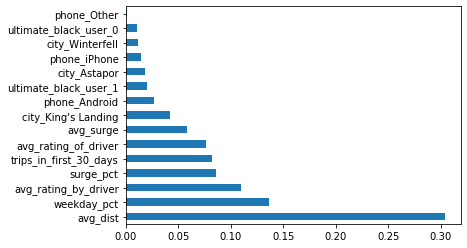

In [39]:
feat_importances = pd.Series(rfc.best_estimator_.named_steps['rfc'].feature_importances_, index=df_cols.columns)
feat_importances.nlargest(18).plot(kind='barh')

In [40]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('lr', LogisticRegression(solver='lbfgs'))]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

lr_scaled = pipeline.fit(X_train, y_train)

lr_predict_scaled = lr_scaled.predict(X_test)

# Compute and print metrics
print (confusion_matrix(y_test , lr_predict_scaled))
print ("Accuracy score: ", accuracy_score(y_test , lr_predict_scaled))
print("F1 score: ", f1_score(y_test , lr_predict_scaled))
print("Precision score: " , precision_score(y_test , lr_predict_scaled))
print("Recall score: " , recall_score(y_test , lr_predict_scaled))
print (classification_report(y_test , lr_predict_scaled))
lr_scaled

[[6592 1208]
 [2335 2365]]
Accuracy score:  0.71656
F1 score:  0.5717393932068173
Precision score:  0.661908760145536
Recall score:  0.5031914893617021
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      7800
           1       0.66      0.50      0.57      4700

    accuracy                           0.72     12500
   macro avg       0.70      0.67      0.68     12500
weighted avg       0.71      0.72      0.71     12500



Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [41]:
%%time
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('lr', LogisticRegression(solver='lbfgs', max_iter=1000))
         ]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
#c_space = np.logspace(-5, 8, 15)
param_grid = {'lr__C': [1, 10, 100, 1000, 10000]
             }

# Instantiate the GridSearchCV object: logreg_cv
logreg = GridSearchCV(pipeline, param_grid, cv=5, verbose=True, n_jobs=-1)

# Fit it to the training data
logreg.fit(X_train, y_train)

logreg_predict = logreg.predict(X_test)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg.best_score_))


# Compute and print metrics
print (confusion_matrix(y_test , logreg_predict))
print ("Accuracy score: ", accuracy_score(y_test , logreg_predict))
print("F1 score: ", f1_score(y_test , logreg_predict))
print("Precision score: " , precision_score(y_test , logreg_predict))
print("Recall score: " , recall_score(y_test , logreg_predict))
print (classification_report(y_test , logreg_predict))
logreg

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.0s finished


Tuned Logistic Regression Parameter: {'lr__C': 10}
Tuned Logistic Regression Accuracy: 0.71968
[[6592 1208]
 [2335 2365]]
Accuracy score:  0.71656
F1 score:  0.5717393932068173
Precision score:  0.661908760145536
Recall score:  0.5031914893617021
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      7800
           1       0.66      0.50      0.57      4700

    accuracy                           0.72     12500
   macro avg       0.70      0.67      0.68     12500
weighted avg       0.71      0.72      0.71     12500

Wall time: 1.18 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lr',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=1000,
                                                           multi_class='warn

## Based on the moderately reliable model metrics and relative importance of influential features, a suggested strategy for long-term retention would be to reward the loyal sectors of longer distance and weekday riders, while looking for ways to become more competitive during the weekend hours that measured increased login activity. 